# ELE 489 HOMEWORK 1

Gürkan DONBALOĞLU / 2220357131


---


**Q1)**
Download the dataset from this link(https://archive.ics.uci.edu/dataset/109/wine). The dataset consists of 178 instances with 13
numerical features and a class label (1, 2, or 3). Load the dataset (you can load it into a
Pandas DataFrame), and visualize some of the features of your choice. See if the features
overlap from different classes.

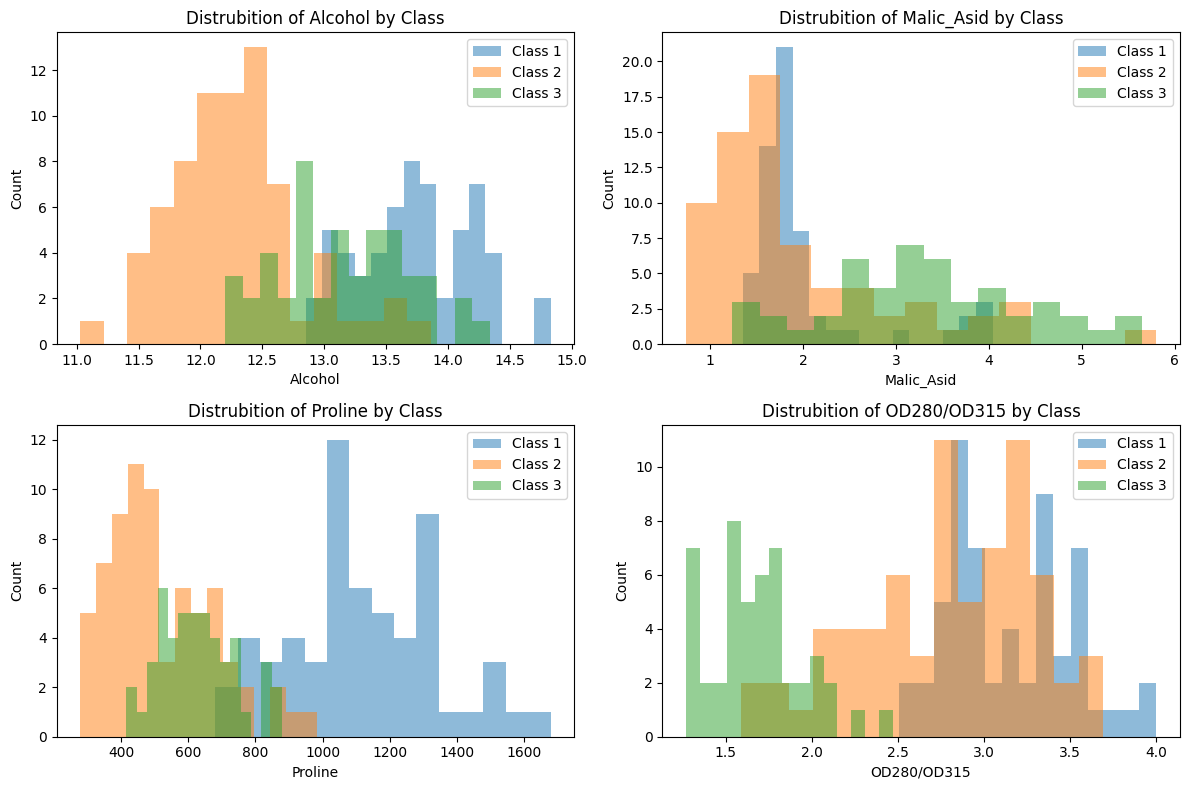

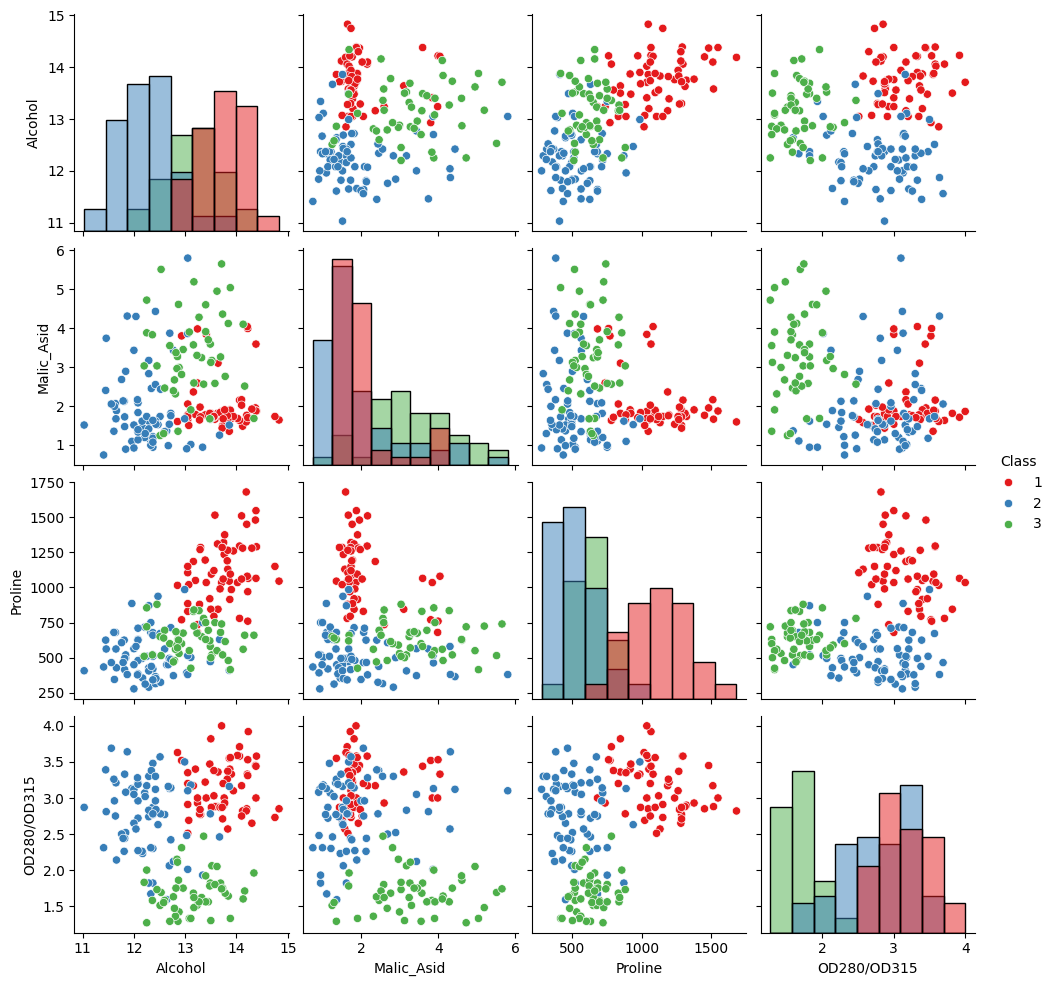

In [ ]:
'''
Q1
Codes for loading and visualizing overlaps for some features in datasets.
The file path is the path where the dataset was loaded and must be represented correctly
If you want to try other features, it is sufficient to change the features_to_select section.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/wine.data'
columns = ['Class', 'Alcohol', 'Malic_Asid', 'Ash', 'Alcalinity_of_Ash', 'Magnesium',
           'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
           'Color_Intensity', 'Hue', 'OD280/OD315', 'Proline']

data_frame = pd.read_csv(file_path, header=None, names=columns)
features_to_select = ['Alcohol', 'Malic_Asid', 'Proline', 'OD280/OD315']
plt.figure(figsize=(12,8))

for i, feature in enumerate(features_to_select, 1):
    plt.subplot(2,2,i)
    for wine_class in data_frame['Class'].unique():
        subset = data_frame[data_frame['Class'] == wine_class]
        plt.hist(subset[feature], bins=15, alpha=0.5, label=f'Class {wine_class}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(f'Distrubition of {feature} by Class')
        plt.legend()

plt.tight_layout()
plt.show()

data_frame['Class'] =  data_frame['Class'].astype(str)

sns.pairplot(data_frame, vars=features_to_select, hue='Class', palette='Set1', diag_kind='hist')
plt.show()





**Comments:**


*	The thing that caught my attention most in the first picture is the proline distribution of class 1, which is strikingly different in class 2 and class 3. Most of the distributions in the first picture were evaluated in 3 different combinations except proline distribution
*  	What makes the difference in this evaluation is the proline distribution, and when we look at the second picture, we can easily see that class 1 has a different distribution than the other two classes.






---



I tried four different senerious and I showed the others in the .pdf file I uploaded
1.	Alcohol, Malic Asid, Color Intensity, Flavanoids
2.	Ash, Magnesium, Total Phenols, Hue
3.	Alcalinity of Ash, Nonflavanoid Phenols, Proanthocyanins, OD280/OD315
4.	Alcohol, Malic Asid, Proline, OD280/OD315


---



**Q2)**
Perform any necessary preprocessing (e.g., normalization, handling missing values). Split the
data into training and testing sets (80%-20%).

In [ ]:
'''
Codes for Q2

'''
X = data_frame.iloc[:, 1:].values # Taking the all value except class numbers
Y = data_frame.iloc[:, 0].values     # Taking class numbers from data

X_min = X.min(axis=0)
X_max = X.max(axis=0)

X = (X - X_min) / (X_max - X_min)   # For normalizing the data

indices = np.arange(len(X))
np.random.seed(45)
np.random.shuffle(indices)          # Shuffling data

split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[indices[:split_index]], X[indices[split_index :]]
Y_train, Y_test = Y[indices[:split_index]], Y[indices[split_index :]]

print('Number of Training Data: ', len(X_train))
print('Number of Test Data: ', len(X_test))

Number of Training Data:  142
Number of Test Data:  36


I took the first column of data, so the class numbers are taken. These values are stored in Y. All other properties are stored in X. The data is normalized because the distribution range of each feature is different, some data are more dominant and reduce the overall accuracy.


---



**Q3)**
Implement the k-NN algorithm from scratch (without using
sklearn.neighbors.KNeighborsClassifier). Allow for different values of K (e.g., 1, 3, 5, 7, 9).
Compare at least two distance metrics (e.g., Euclidean, Manhattan). Calculate classification
accuracy for each value of K. Plot the accuracy vs. K, and analyze the impact of K on model
performance. Provide a confusion matrix and classification report.


---



In [ ]:
'''
This code for uploading the knn.py file
It will be used in the next code
You can easily check whether it is uploaded or not, using !ls code
'''
#from google.colab import files
#uploaded = files.upload()



Accuracy with Euclidean Distance: 97.22%
Accuracy with Manhattan Distance: 94.44%
Accuracy with Minkowski Distance P3: 94.44%


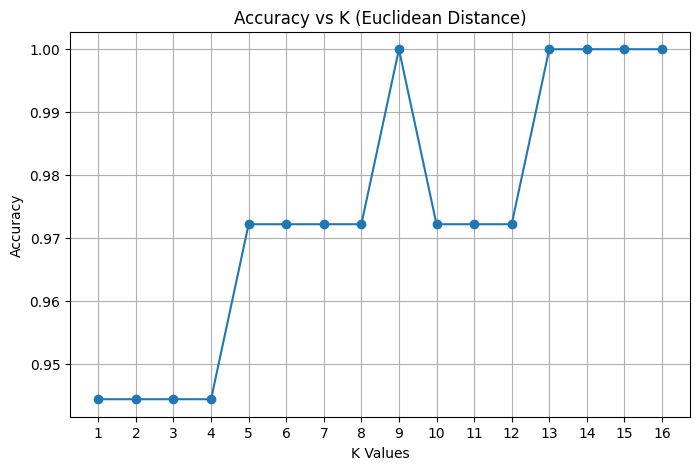

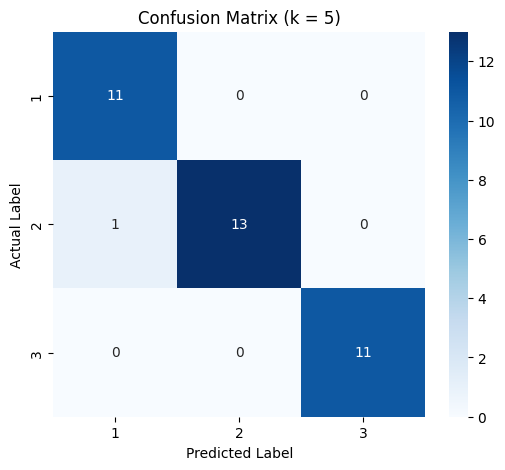

Class	Precision	Recall		F1-Score	Support
1	0.92		1.00		0.96		11
2	1.00		0.93		0.96		14
3	1.00		1.00		1.00		11


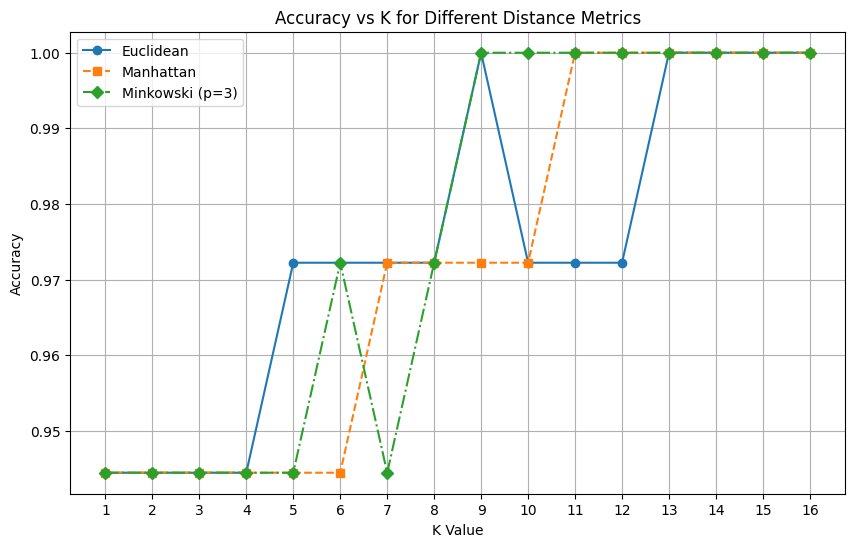

In [ ]:
'''
For running this code, there are two importing point
Firstly, file_path must be the path of .data file
Secondly, you should make sure to upload the knn.py file here
it can be easily check running !ls
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from knn import (
    euclidean_distance, manhattan_distance, minkowski_distance_p3,
    knn_predict, evaluate_accuracy
)

# Load and prepare the dataset
def load_data(file_path, columns):
    data_frame = pd.read_csv(file_path, header=None, names=columns)
    X = data_frame.iloc[:, 1:].values   # Features
    Y = data_frame.iloc[:, 0].values    # Class label
    return X, Y

# Normalize data to range [0,1] for better distance computation
def normalize_data(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    X_normalized = (X - X_min) / (X_max - X_min)
    return X_normalized

# Split dataset into training and testing sets
def data_split(X, Y, split_ratio=0.8, seed=42):
    indices = np.arange(len(X))
    np.random.seed(seed)
    np.random.shuffle(indices)
    split_index = int(len(X) * split_ratio)
    X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
    Y_train, Y_test = Y[indices[:split_index]], Y[indices[split_index:]]
    return X_train, X_test, Y_train, Y_test

# Plot accuracy for different k values
def plot_accuracy_vs_k(X_train, Y_train, X_test, Y_test, distance_func, k_values):
    accuracy_matrix = []
    for k_value in k_values:
        acc = evaluate_accuracy(X_train, Y_train, X_test, Y_test, k_value, distance_func)
        accuracy_matrix.append(acc)

    distance_name = distance_func.__name__.replace("_", " ").title()
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, accuracy_matrix, marker='o')
    plt.title(f'Accuracy vs K ({distance_name})')
    plt.xlabel('K Values')
    plt.ylabel('Accuracy')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

# Build and display confusion matrix, classification report
def confusing_matrix_and_classification_report(Y_test, predictions, classes, k):
    class_n = sorted(list(set(classes)))
    class_to_index = {label: index for index, label in enumerate(class_n)}

    conf_matrix = np.zeros((len(class_n), len(class_n)), dtype=int)
    for actual, predicted in zip(Y_test, predictions):
        i = class_to_index[actual]
        j = class_to_index[predicted]
        conf_matrix[i][j] += 1

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_n, yticklabels=class_n)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title(f'Confusion Matrix (k = {k})')
    plt.show()

    # Print precision, recall, F1-score for each class
    print("Class\tPrecision\tRecall\t\tF1-Score\tSupport")

    for i, label in enumerate(class_n):
        TP = conf_matrix[i][i]
        FP = sum(conf_matrix[:, i]) - TP
        FN = sum(conf_matrix[i, :]) - TP
        support = sum(conf_matrix[i, :])

        precision_den = TP + FP
        recall_den = TP + FN

        precision = TP / precision_den
        recall = TP / recall_den

        f1_den = precision + recall
        f1 = 2 * precision * recall / f1_den

        print(f"{label}\t{precision:.2f}\t\t{recall:.2f}\t\t{f1:.2f}\t\t{support}")

# I wrote this code just the show the accurancy values of different functions at the same K value
def compare_distance_metrics_plot(X_train, Y_train, X_test, Y_test, k_values, distance_funcs):
    styles = {
        "Euclidean": {"marker": "o", "linestyle": "-"},
        "Manhattan": {"marker": "s", "linestyle": "--"},
        "Minkowski (p=3)": {"marker": "D", "linestyle": "-."}
    }

    plt.figure(figsize=(10, 6))
    for name, func in distance_funcs.items():
        accuracies = []
        for k in k_values:
            preds = [knn_predict(X_train, Y_train, x, k, func) for x in X_test]
            acc = np.mean(np.array(preds) == Y_test)
            accuracies.append(acc)

        style = styles.get(name, {})
        plt.plot(k_values, accuracies, label=name, **style)

    plt.title("Accuracy vs K for Different Distance Metrics")
    plt.xlabel("K Value")
    plt.ylabel("Accuracy")
    plt.xticks(k_values)
    plt.grid(True)
    plt.legend()
    plt.show()

# Main execution block
def main():
    # Define dataset path and column names
    file_path = '/content/wine.data'
    columns = ['Class', 'Alcohol', 'Malic_Asid', 'Ash', 'Alcalinity_of_Ash', 'Magnesium',
               'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
               'Color_Intensity', 'Hue', 'OD280/OD315', 'Proline']

    # Load and normalize data
    X, Y = load_data(file_path, columns)
    X = normalize_data(X)
    X_train, X_test, Y_train, Y_test = data_split(X, Y)

    # Test different distance metrics and print accuracies
    k = 5

    for dist_func in [euclidean_distance, manhattan_distance, minkowski_distance_p3]:
        acc = evaluate_accuracy(X_train, Y_train, X_test, Y_test, k, dist_func)
        print(f"Accuracy with {dist_func.__name__.replace('_', ' ').title()}: {acc * 100:.2f}%")

    # Visualize accuracy vs k for a chosen distance metric
    plot_accuracy_vs_k(X_train, Y_train, X_test, Y_test, euclidean_distance, range(1, 17))

    # Evaluate performance using confusion matrix and metrics
    predictions = [knn_predict(X_train, Y_train, x, k, euclidean_distance) for x in X_test]
    confusing_matrix_and_classification_report(Y_test, predictions, Y, k)


    distance_funcs = {
    "Euclidean": euclidean_distance,
    "Manhattan": manhattan_distance,
    "Minkowski (p=3)": minkowski_distance_p3
    }

    compare_distance_metrics_plot(X_train, Y_train, X_test, Y_test, range(1, 17), distance_funcs)


if __name__ == "__main__":
    main()



Looking at the first graph, it is clear that there is an accuracy that increases with the value of k. If Euclidean were to be used, the most logical choice for the smaller k value would be 9. The last graph shows the accuracy values ​​of these 3 different functions for different k values. The result from this graph actually reaches the same values ​​in 3 different functions for very small and very large k values. However, this may not always be the case. Shuffle seed value changes these graphics. A detailed comparison of this is shown in the .pdf file.